In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [2]:
data=pd.read_csv('vgsales.csv')
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
# Common information about the data set and attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.shape

(16598, 11)

<BarContainer object of 31 artists>

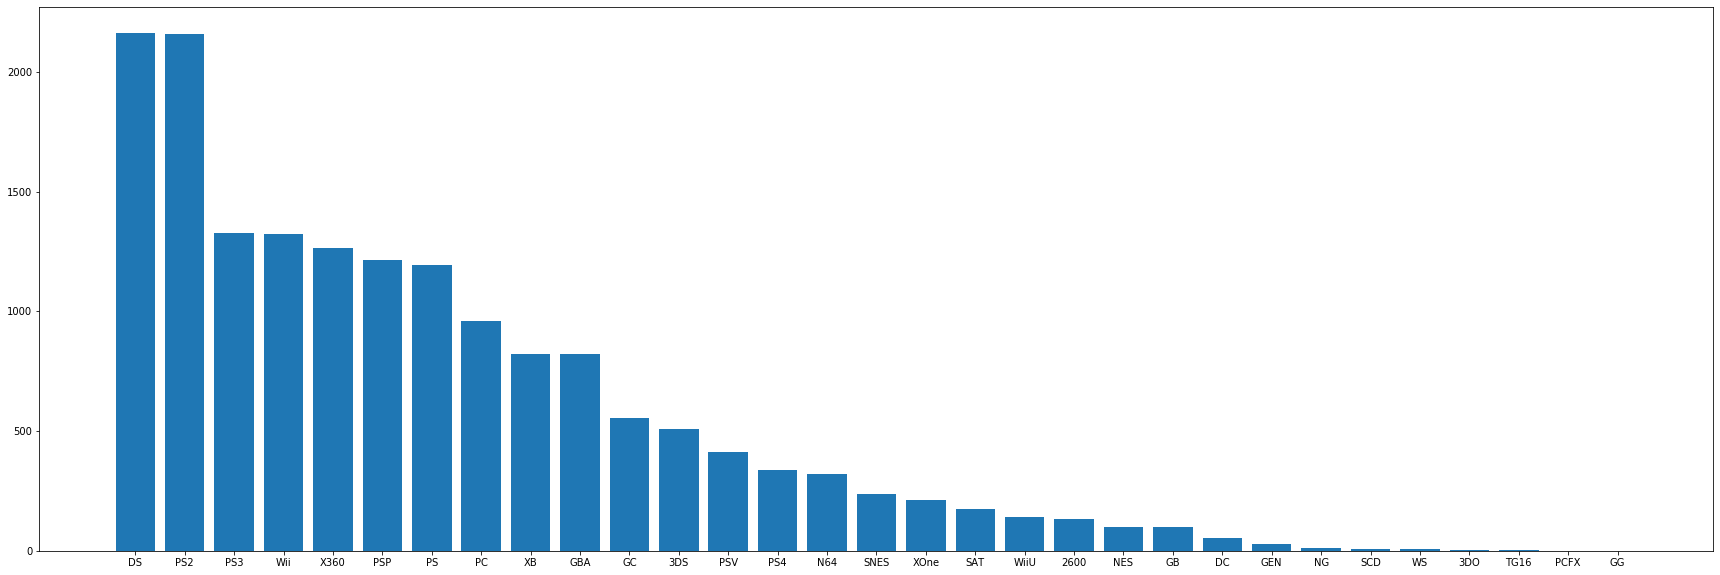

In [5]:
#platform which has highest games
plt.figure(figsize=(30,10))
plt.bar(data['Platform'].value_counts().index,data['Platform'].value_counts())

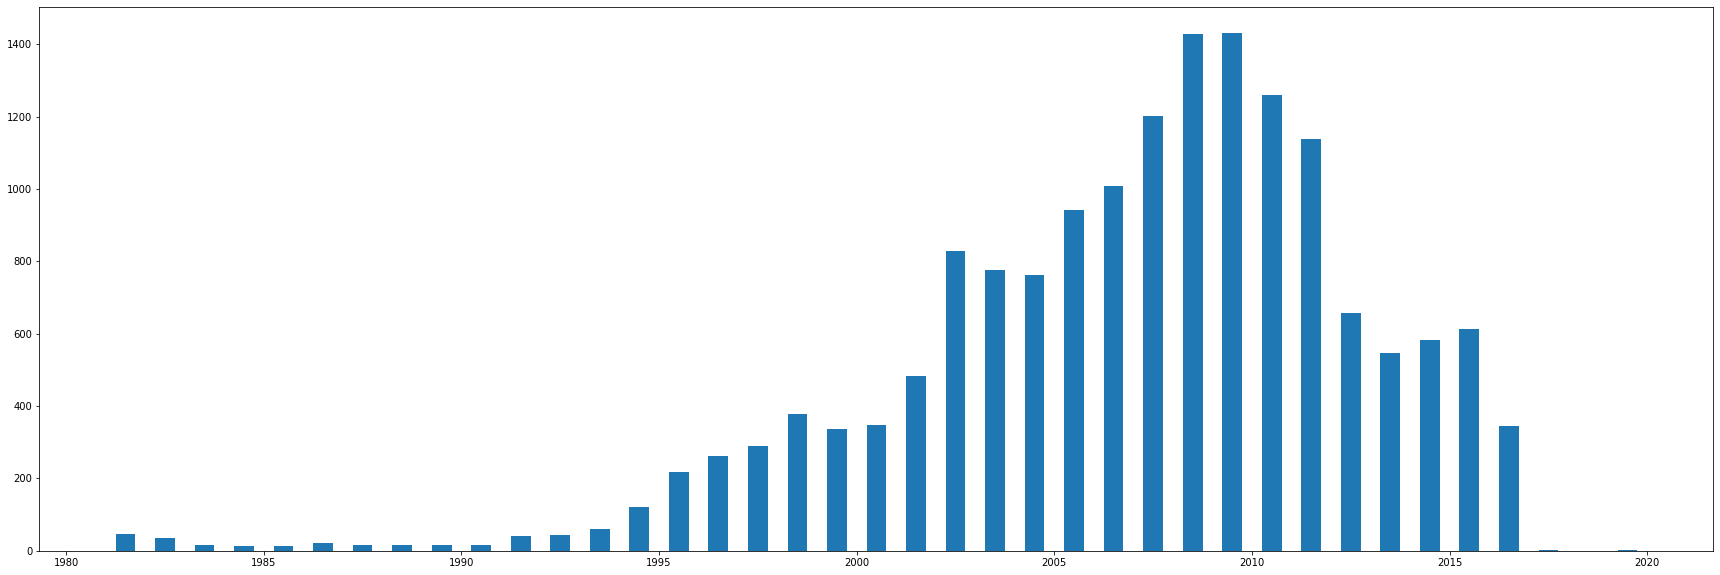

In [6]:
#no. of Games release in a year
plt.figure(figsize=(30,10))
plt.hist(data['Year'],bins=[a for a in range(1981,2021)],rwidth=0.5)
plt.show()

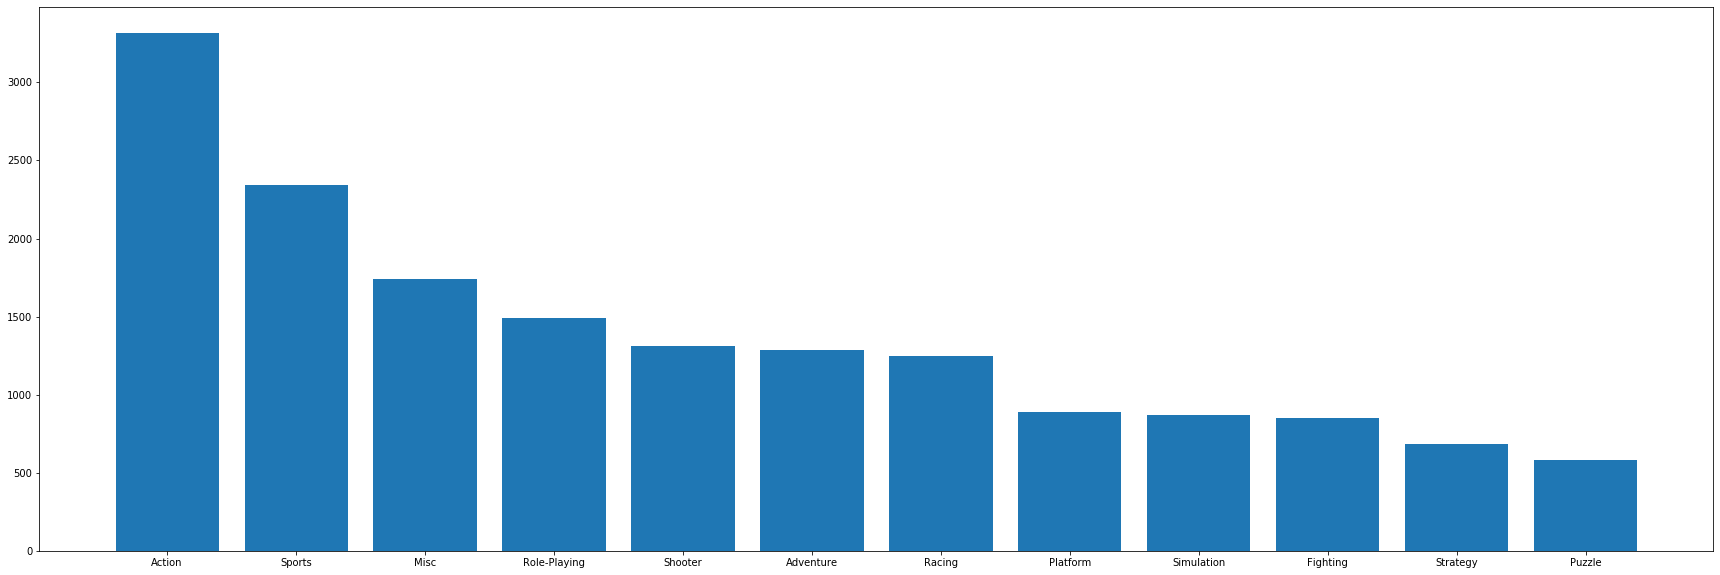

In [7]:
#Which Genre has the highest no. of games
plt.figure(figsize=(30,10))
plt.bar(data['Genre'].value_counts().index,data['Genre'].value_counts())
plt.show() 

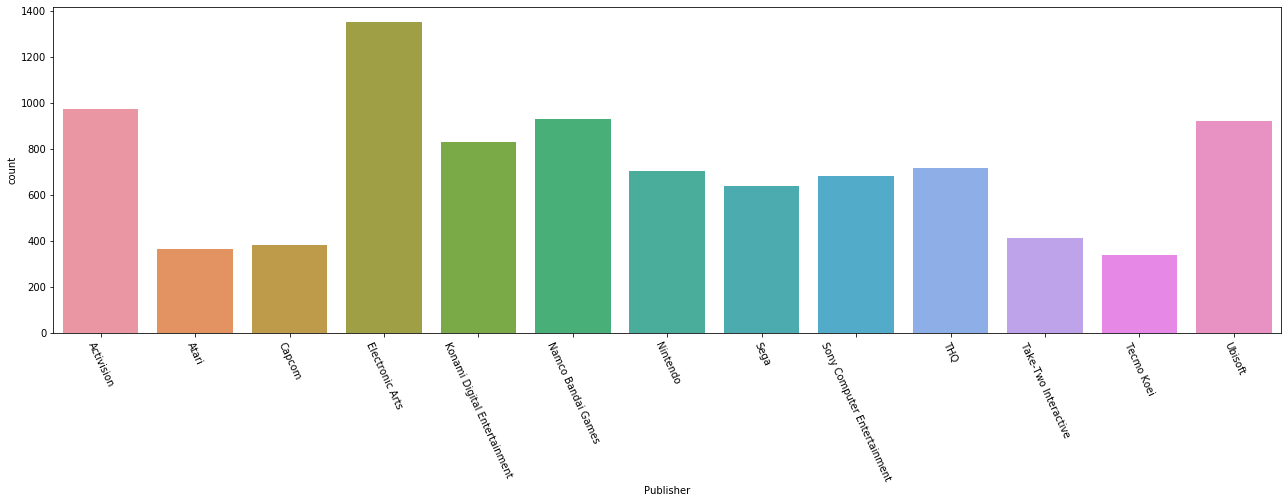

In [8]:
#Game Publishers vs their games count
df_Publisher=pd.DataFrame(data.groupby("Publisher").Rank.count())
df_Publisher = df_Publisher.rename(columns={"Rank": "count"})
df_Publisher = df_Publisher.loc[df_Publisher["count"] > 300]

ingredients = list(df_Publisher.index)
plt.figure(figsize=(22,6))
a = sns.barplot(x=df_Publisher.index, y=df_Publisher["count"])
a.set_xticklabels(labels=df_Publisher.index, rotation=-65) 
plt.show()

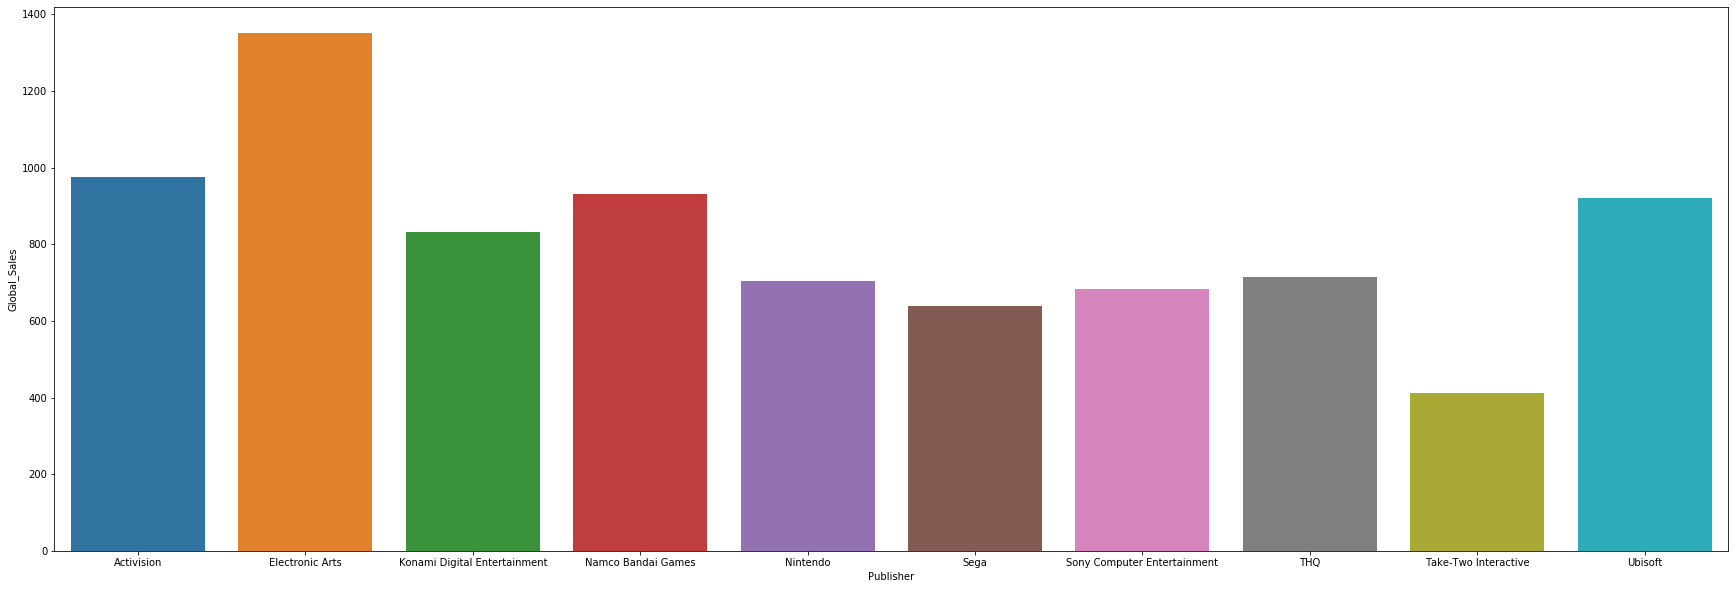

In [9]:
dff = data.groupby(['Publisher'], as_index=False)['Global_Sales'].count()
dff=dff[dff['Global_Sales']>400]
plt.figure(figsize=(30,10))

sns.barplot(x='Publisher',data=dff,y='Global_Sales')

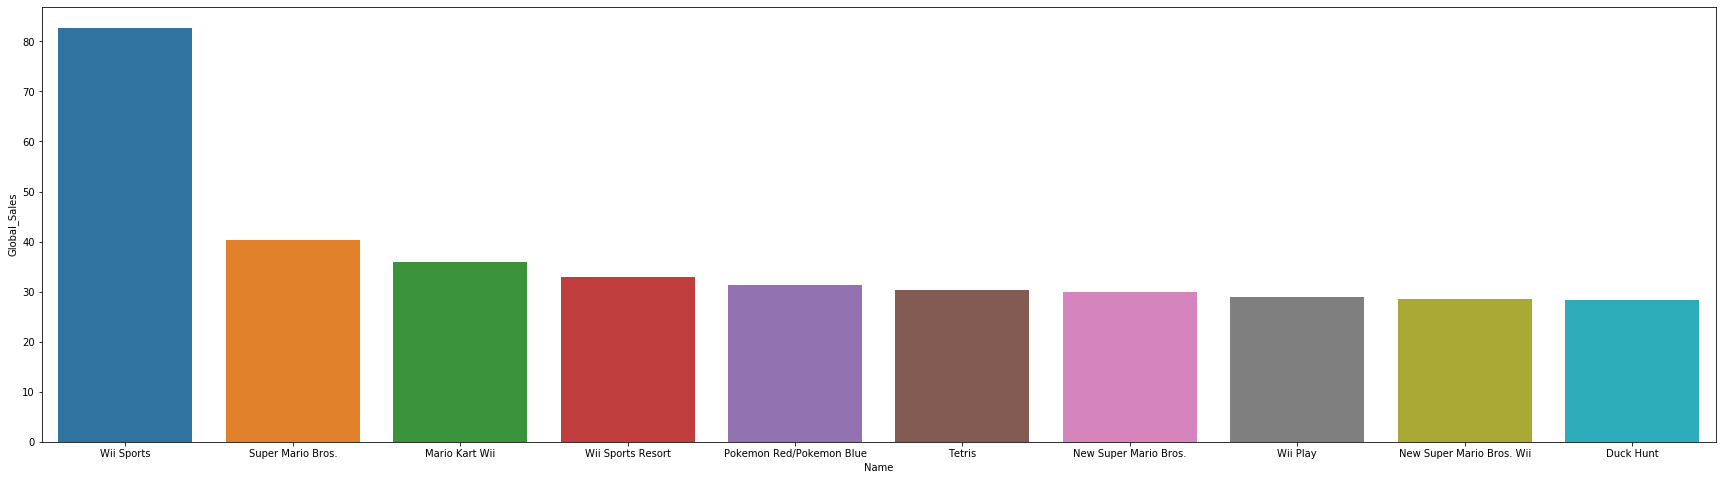

In [10]:
#Highest Global_Sales game
df=data[['Name','Global_Sales']].sort_values('Global_Sales',ascending=False)[:10]
plt.figure(figsize=(30,8))
sns.barplot(data=df,x='Name',y='Global_Sales')

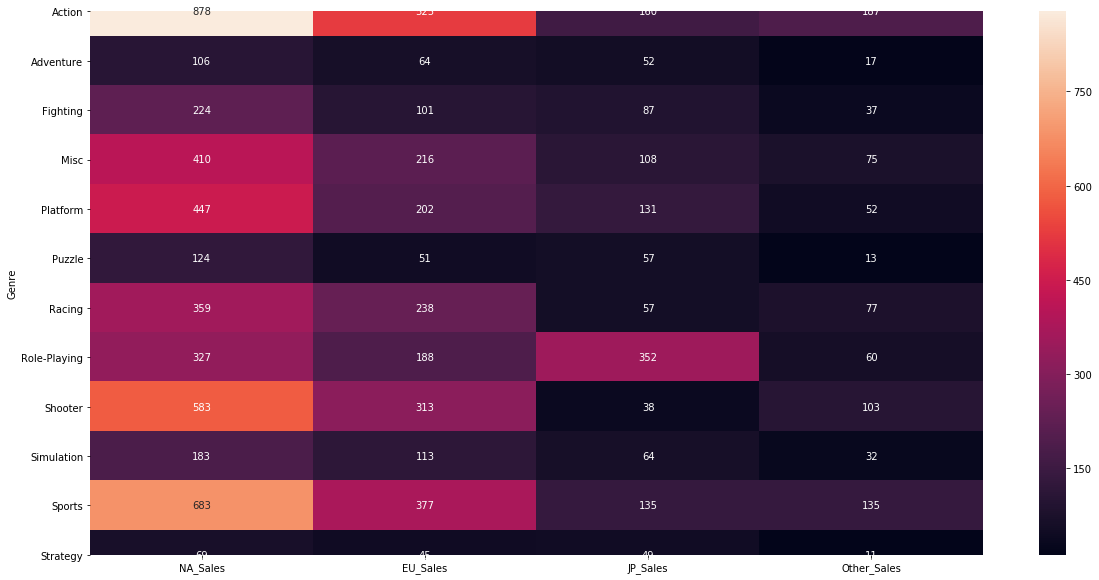

In [11]:
#Genre vs sales heatmap
sales=data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales = sales.groupby('Genre').sum()
plt.figure(figsize=(20,10))
sns.heatmap(sales,annot=True,fmt= '.0f')

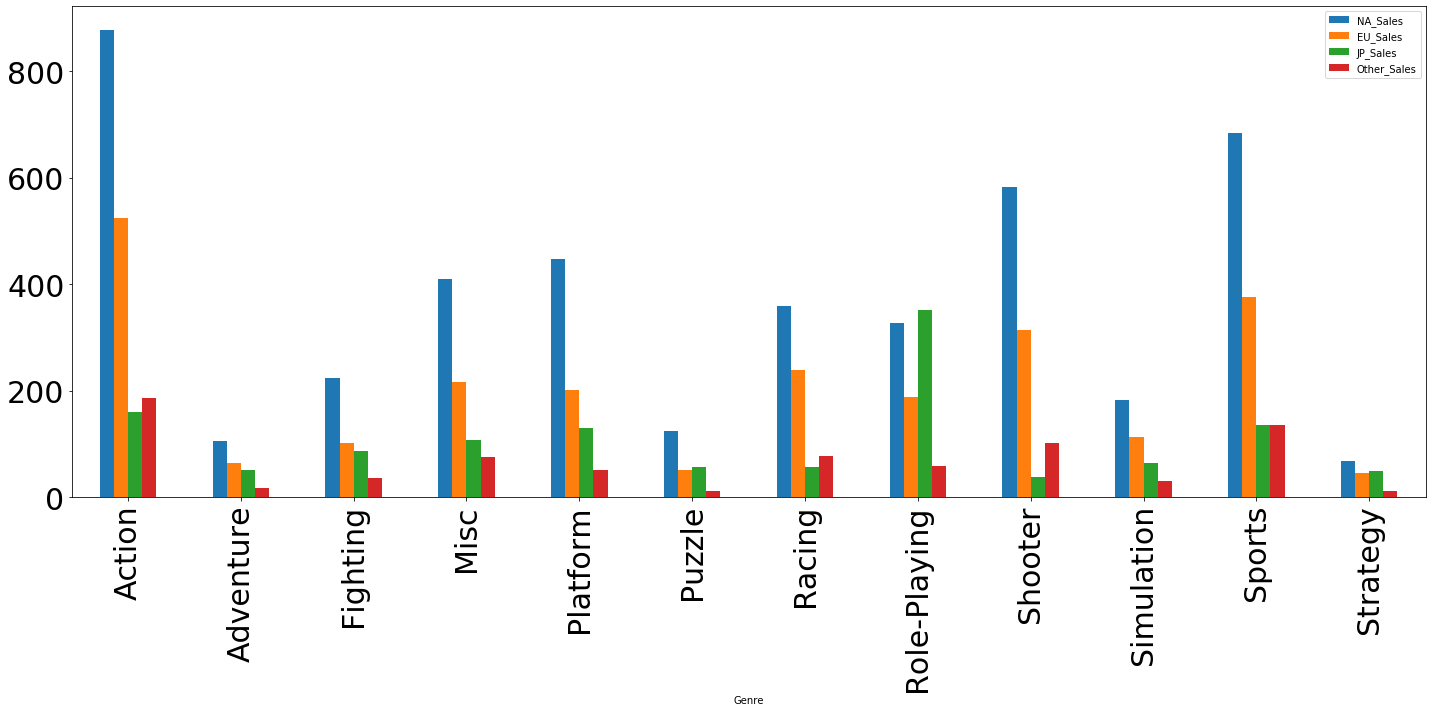

In [12]:
#Genre vs sales plot
sales.plot.bar(figsize=(20,10),fontsize=30)
plt.tight_layout()
plt.show()

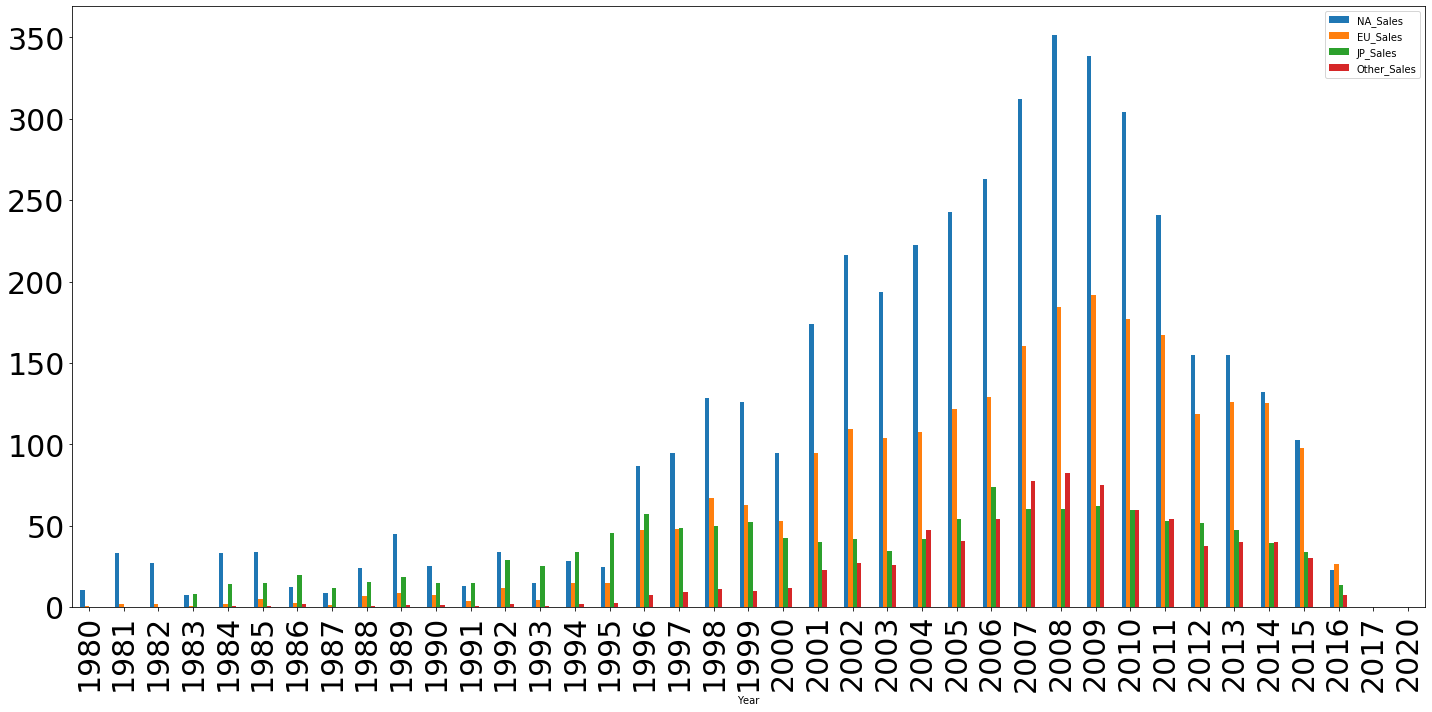

In [13]:
#Year vs sales plot
sales1=data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Year').sum()
sales1.index=sales1.index.astype(int)
sales1.plot.bar(figsize=(20,10),fontsize=30)
plt.tight_layout()
plt.show()

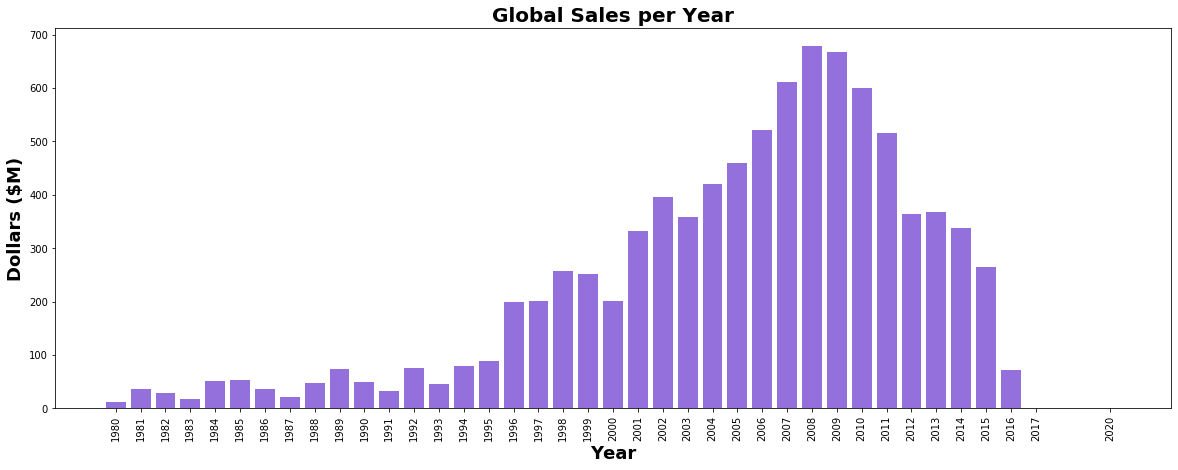

In [14]:
#Global sales per year
df_year = data.groupby('Year').sum().reset_index(drop=False)

# Plot parameters 
figsize = [20, 7]
x = df_year['Year']
y = df_year['Global_Sales']
width = 0.8
color = 'mediumpurple'

# Bar chart
plt.figure(figsize=figsize)
bars = plt.bar(x, y, 
               width=width, 
               color=color)

# Non-data objects
plt.title('Global Sales per Year', fontdict={'fontweight':'bold', 'fontsize':20})    # A bit of hardcoding
plt.xlabel('Year', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Dollars ($M)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xticks(df_year['Year'], rotation = 90)

plt.show()

As we see on the diagram below, the growth started in the 1996 and reached its peak a decade after. The growth is related to the popularity of game consoles starting in the beginning of the 21th century, whereas the downhill after 2009-2010 is coinciding with the boom of the mobile gaming industry.

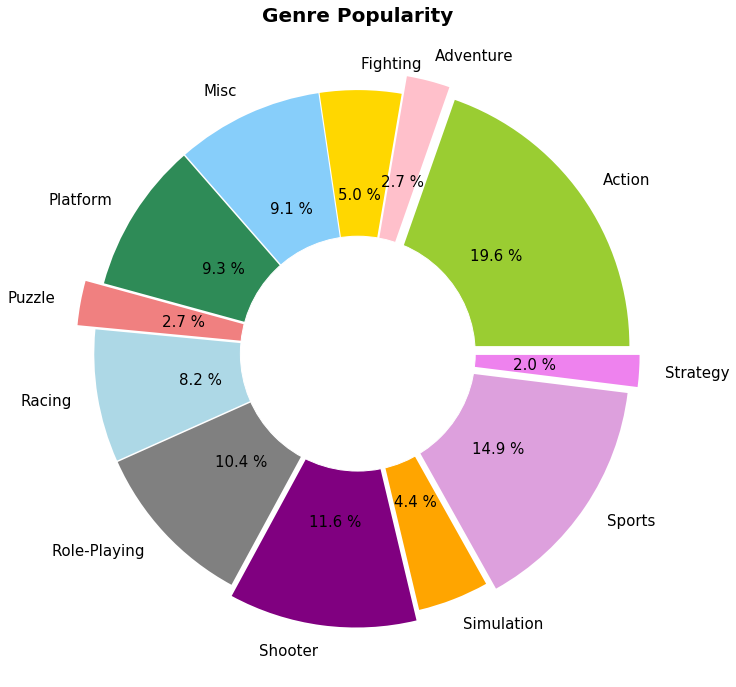

In [15]:
# Summary by genre
df_genre = data.groupby('Genre').sum().reset_index(drop=False)

# Plot parameters
figsize = [12, 12]
x = [i for i in df_genre['Global_Sales']]
labels = [i for i in df_genre['Genre']]
colors = ['yellowgreen','pink','gold','lightskyblue','seagreen','lightcoral','lightblue',
          'grey', 'purple', 'orange','plum','violet','magenta','cyan']
explode = [0.05 if df_genre['Genre'][i] in ['Action', 'Sports', 'Shooter'] else    # List comprehension
           0.08 if df_genre['Genre'][i] in ['Strategy', 'Puzzle', 'Adventure'] else 
           0.01 for i in range(len(df_genre['Genre']))]
autopct = '%.1f %%'
textprops = {'fontsize': 15}

# Pie chart
plt.figure(figsize=figsize)
plt.pie(x, 
        labels=labels, 
        colors=colors,
        autopct=autopct, 
        explode=explode,
        textprops=textprops)

# Make a hole, so it's a donut
my_circle=plt.Circle((0,0), 0.45, color='white')    # (0,0) - coordinated of the center, 0.45 - diameter
p=plt.gcf()
p.gca().add_artist(my_circle)

# Non-data objects
plt.title('Genre Popularity', fontdict={'fontweight':'bold', 'fontsize':20})

plt.show()

In [16]:
# Grouping sales by platform
platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']]
platform = platform.groupby('Platform').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
platform.style.set_properties(**{'background-color': 'plum'}, subset=['Global_Sales'])    # Highlight c column

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PS2,583.84,339.29,139.2,193.44,1255.64
1,X360,601.05,280.58,12.43,85.54,979.96
2,PS3,392.26,343.71,79.99,141.93,957.84
3,Wii,507.71,268.38,69.35,80.61,926.71
4,DS,390.71,194.65,175.57,60.53,822.49
5,PS,336.51,213.6,139.82,40.91,730.66
6,GBA,187.54,75.25,47.33,7.73,318.5
7,PSP,108.99,68.25,76.79,42.19,296.28
8,PS4,96.8,123.7,14.3,43.36,278.1
9,PC,93.28,139.68,0.17,24.86,258.82


According to the data, PlayStation 2, Xbox 360, and PlayStation 3 have the most successful game sales rates globally.
Game consoles has been popular for a few decades because of the advantages that consoles can provide over PCs (easy to use, cost less, no need to upgrade, etc.)

In [17]:
# Grouping sales by genre
publishers = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']]
publishers = publishers.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
publishers.style.set_properties(**{'background-color': 'lightgreen'}, subset=['Global_Sales'])    # Highlight a column

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,816.87,418.74,455.42,95.33,1786.56
1,Electronic Arts,595.07,371.27,14.04,129.77,1110.32
2,Activision,429.7,215.53,6.54,75.34,727.46
3,Sony Computer Entertainment,265.22,187.72,74.1,80.45,607.5
4,Ubisoft,253.43,163.32,7.5,50.26,474.72
5,Take-Two Interactive,220.49,118.14,5.83,55.24,399.54
6,THQ,208.77,94.73,5.01,32.14,340.77
7,Konami Digital Entertainment,92.16,69.69,91.3,30.31,283.64
8,Sega,109.4,82,57.03,24.52,272.99
9,Namco Bandai Games,69.52,42.63,127.07,14.69,254.09


 I would like to emphasize three most successful companies and genres of video games they are focused on.
Nintendo, EA, and Activision have been showing a decent level of revenue over the years.



Although all of them spread their efforts to all video game markets, having visualized the data, it became clear that the companies have a tendency to focus on particular genres. For instance, the bar chart below shows that Nintendo makes the most of their revenue from platform games, whereas EA (well known for its sport simulator games) and Activision are aimed on sport games and shooters accordingly.


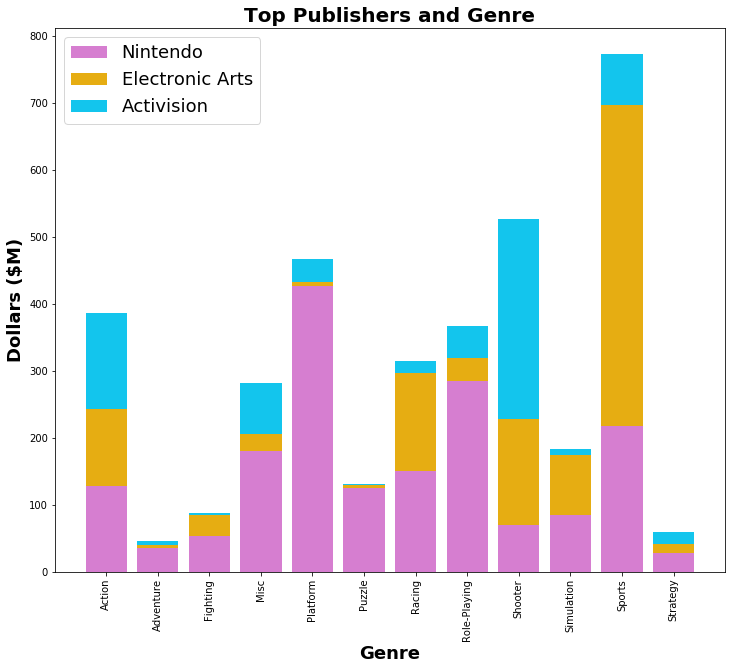

In [18]:
# Subsetd based on publisher
nd = data.loc[data['Publisher'] == 'Nintendo', ['Genre', 'Global_Sales']].groupby('Genre').sum().reset_index(drop=False)
ea = data.loc[data['Publisher'] == 'Electronic Arts', ['Genre', 'Global_Sales']].groupby('Genre').sum().reset_index(drop=False)
av = data.loc[data['Publisher'] == 'Activision', ['Genre', 'Global_Sales']].groupby('Genre').sum().reset_index(drop=False)

# Axis parameters
labels = [i for i in nd['Genre']]
y1 = np.array([i for i in nd['Global_Sales']])  # Has to be an array!
y2 = np.array([j for j in ea['Global_Sales']])
y3 = np.array([k for k in av['Global_Sales']])

# Bar chart (clustered)
plt.figure(figsize=(12, 10))
plt.bar(labels, y1, color='#d67ed0')
plt.bar(labels, y2, bottom=y1, color='#e6ad12')
plt.bar(labels, y3, bottom=y1+y2, color='#13c5ed')  # bottom - stacking

# Non-data objects
plt.title('Top Publishers and Genre', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Genre', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Dollars ($M)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xticks(rotation=90)
plt.legend(['Nintendo', 'Electronic Arts', 'Activision'], fontsize=18)

plt.show()

In [19]:
#checking for Nan values
data.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [20]:
# percentage of NaN Values
(data.isna().sum() * 100) / data.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [21]:
# Separate the Numerical And Categorical Features
categorical_data = data.select_dtypes('O')

categorical_data.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [22]:
numerical_data = data.select_dtypes(('int', 'float'))

numerical_data.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,41.49,29.02,3.77,8.46,82.74
1,1985.0,29.08,3.58,6.81,0.77,40.24
2,2008.0,15.85,12.88,3.79,3.31,35.82
3,2009.0,15.75,11.01,3.28,2.96,33.00
4,1996.0,11.27,8.89,10.22,1.00,31.37


In [23]:
#  Checking & Remove Nan Values

data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [24]:
#one is numerical and other one is categorical so we use include='all' feature to show both features description
data[['Year', 'Publisher']].describe(include='all')

,Year,Publisher
count,16327.000000,16540
unique,NaN,578
top,NaN,Electronic Arts
freq,NaN,1351
mean,2006.406443,NaN
std,5.828981,NaN
min,1980.000000,NaN
25%,2003.000000,NaN
50%,2007.000000,NaN
75%,2010.000000,NaN


In [25]:
# Filling missing value in year feature
data.Year = data.Year.fillna(data.Year.mean())

In [26]:
# Change Year dtype to int32
data.Year = data.Year.astype('int32')
data.Year

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int32

In [27]:
#Publisher is a categorical feature so we need to fill the missing values with values which is most repetitive.
data.Publisher.value_counts(normalize=True)

Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
Warp                            0.000060
Locus                           0.000060
The Learning Company            0.000060
Adeline Software                0.000060
Giza10                          0.000060
Name: Publisher, Length: 578, dtype: float64

In [28]:
# To replace value we can use mode to get 'Electronic Arts'.
data.Publisher = data.Publisher.fillna(data.Publisher.mode()[0])

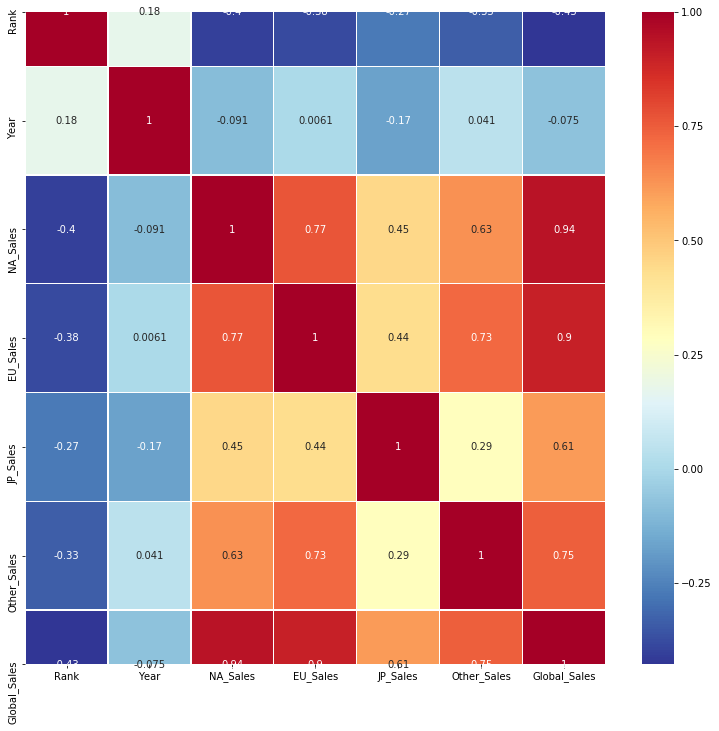

In [29]:
#Displaying the correlation for the numerical feature.
corr_ = data.corr()
plt.figure(figsize=(13,12))
sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')
plt.show()

In [30]:
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [31]:
#Label Encoding
data2 = data.copy()
le = LabelEncoder()

In [32]:
feature = ["Platform", "Genre"]
for col in feature:
    data[col] = le.fit_transform(data[col])    

In [33]:
#creating train and target feature for train and test splites
X = data[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = data['Global_Sales'].values

In [34]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=45)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12448, 6), (12448,), (4150, 6), (4150,))

In [35]:
# Import r2 score for Calculation
from sklearn.metrics import r2_score

MODEL SELECTION

KNN

In [36]:

from sklearn.neighbors import KNeighborsRegressor

In [37]:
kRange = range(1,15,1)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)
    
    scores_list.append(r2_score(y_test,pred))

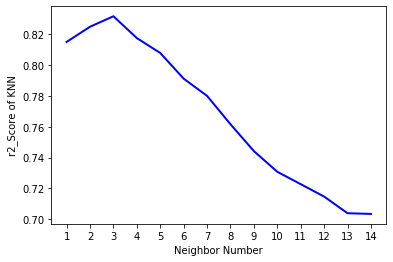

In [38]:
plt.plot(kRange, scores_list, linewidth=2, color='blue')
plt.xticks(kRange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()   

In [39]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors = 3)

regressor_knn.fit(X_train,y_train)
pred = regressor_knn.predict(X_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

mse = mean_squared_error(y_test, pred)
print('RMSE :', np.sqrt(mse))

0.8317085748592441
RMSE : 0.7747599360451399


Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=32)

In [41]:
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print(r2_score(y_test, pred))

mse = mean_squared_error(y_test, pred)
print('RMSE :', np.sqrt(mse))

0.853816098913969
RMSE : 0.7220810275945232


RandomForest Regressor

In [42]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state= 10)

In [43]:
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred))

mse = mean_squared_error(y_test, pred)
print('RMSE :', np.sqrt(mse))

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.827874999493046
RMSE : 0.783534525375657


SVM

In [44]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear')
svr_rbf = SVR(kernel='rbf')

In [45]:
svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

pred_linear = svr_linear.predict(X_test)
pred_rbf = svr_rbf.predict(X_test)

print(r2_score(y_test, pred_linear))
print(r2_score(y_test, pred_rbf))

mse = mean_squared_error(y_test, pred_linear)
print('RMSE :', np.sqrt(mse))

mse2 = mean_squared_error(y_test, pred_rbf)
print('RMSE :', np.sqrt(mse2))

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9982111842069038
0.3758612493599557
RMSE : 0.07987648969151492
RMSE : 1.4920271783104226


XGBoost Regressor

In [46]:

from xgboost import XGBRegressor
xgb = XGBRegressor()

In [47]:
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(r2_score(y_test, pred))

mse = mean_squared_error(y_test, pred)
print('RMSE :', np.sqrt(mse))

0.8613849561149882
RMSE : 0.7031392541121836


In [48]:
from tabulate import tabulate

mydata = [["KNN", "83%","0.77"], 
          ["Decision Tree Regressor", "85%","0.78"], 
          ["SVM linear","99%","0.07"], 
          ["SVM rbf", "37%","1.49"],
          ["XGBoost Regressor","86%","0.70"]]

head = ["Model Name","Accuracy","Root Mean Square Error"]

print(tabulate(mydata, headers=head, tablefmt="fancy_grid"))

╒═════════════════════════╤════════════╤══════════════════════════╕
│ Model Name              │ Accuracy   │   Root Mean Square Error │
╞═════════════════════════╪════════════╪══════════════════════════╡
│ KNN                     │ 83%        │                     0.77 │
├─────────────────────────┼────────────┼──────────────────────────┤
│ Decision Tree Regressor │ 85%        │                     0.78 │
├─────────────────────────┼────────────┼──────────────────────────┤
│ SVM linear              │ 99%        │                     0.07 │
├─────────────────────────┼────────────┼──────────────────────────┤
│ SVM rbf                 │ 37%        │                     1.49 │
├─────────────────────────┼────────────┼──────────────────────────┤
│ XGBoost Regressor       │ 86%        │                     0.7  │
╘═════════════════════════╧════════════╧══════════════════════════╛


Summary

    1. The most profitable region - North America
    2. Popular video game genres are action, sport, shooter
    3. Platforms with the biggest number of video games released: PS2, Xbox 360, PS3
    4. The most successful video game publishers: Nintendo Co. Ltd., Electronic Arts Inc., Activision Publishing,    Inc.